Import Pabdas library

In [1]:
import pandas as pd


Create a data frame to read the training data set

df1 = pd.read_csv('train.csv')

Check the basic information about this data set

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Using drop method to drop these feature 

In [4]:
df1.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1,inplace = True)

Check the feature got after drop feature

In [5]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


For data processing activity and handle the missing values, first check the missing data.So for that use this command.Age feature having a missing value. 

In [6]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

Describe the missing value. 

In [7]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Using filling method, filling the missing value with the mean of the age.

In [8]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

Now there no missing value.Handle the missing value.

In [9]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

After handle the missing value, next step to see categorical feature. In the given data set , sex feature having a categorial value.So this has to be converted.Here use get dummies method on this sex feature and dropping the first column toward the dummy trap issue.

In [10]:
l_sex_dummies = pd.get_dummies(df1['Sex'],drop_first=True)

Combine this new feature with my existing data frame.

In [11]:
df1 = pd.concat([df1,l_sex_dummies],axis=1)

In [12]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


Now not need sex feature anymore beacuse already converted a feature for that.So using drop method to drop the sex feature. 

In [13]:
df1.drop(['Sex'],axis=1,inplace = True)

Sex feature has been dropped now.

In [14]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


For feature scaling Age and Fare(Because these values are varies with respect to other features) import Standard Scaler library.

In [15]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()

Scale these two feature

In [16]:
feature_scale = ['Age','Fare']
df1[feature_scale] = sts.fit_transform(df1[feature_scale])

In [17]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1


Now split this data set into X and Y variable.Here Servied is the target variable.To get the X variable dropping the survived feature and to get the Y variable only taking the servived feature. 

In [18]:
X = df1.drop(['Survived'],axis=1)
y = df1['Survived']

Implement the model selection technique.Using a grid search cv to find the best model.
Import library for Grid search , Decision tree 

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Creating a dictionary variable and later pass this variable to the grid search cv library. 

In [20]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

Passing the value to the grid search class and the cross validation will be five slice.

In [21]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

To see the individual score 

In [22]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.774477,{'criterion': 'gini'}
1,KNeighborsClassifier,0.802492,{'n_neighbors': 5}
2,SVC,0.811481,"{'C': 100, 'kernel': 'rbf'}"


Creating a model object.In the in individual score section , we see SVC give the best result. So SVC the best model for the given dataset.

In [23]:
model_svc = SVC( C= 100,kernel='rbf')

Train the model using X and Y variable

In [24]:
model_svc.fit(X, y)


SVC(C=100)

Create a new data frame to read the test data set

In [25]:
df2 = pd.read_csv('test.csv')

In [26]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Drop the unwanted feature

In [27]:
df3=df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1 )

Check the missing value.

In [28]:
df3.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

Using fillna method to filled the missing value. 

In [29]:
df3['Age'].fillna(df3['Age'].mean(),inplace=True)
df3['Fare'].fillna(df3['Fare'].mean(),inplace=True)

To handle the categorical feature using the get dummies method

In [30]:
l_sex_dummies=pd.get_dummies(df3['Sex'],drop_first=True)
df3= pd.concat([df3,l_sex_dummies],axis=1)
df3.drop(['Sex'], axis=1, inplace=True )

In [31]:
df3.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


Implement the feature scaling on the Age and Fare feature. 

In [32]:
df3[feature_scale] = sts.fit_transform(df3[feature_scale])


In [33]:
df3.head()

,Pclass,Age,Fare,male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


Predicted the results of the test set 

In [34]:
y_predicted = model_svc.predict(df3)

Save data into csv file 

In [35]:
submission = pd.DataFrame({
        "PassengerId": df2['PassengerId'],
        "Survived": y_predicted
    })

In [36]:
submission.to_csv('Assignment.csv', index=False)

# Cross Validation

Cross Validation (K-fold)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [40]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.84269663 0.7752809  0.79775281 0.80898876 0.79775281
 0.78651685 0.80898876 0.78651685 0.78651685]


In [41]:
# kNN Score
round(np.mean(score)*100, 2)

79.47

# Grid Search

## Modelling

In [45]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### Decision Tree

In [42]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.75280899 0.84269663 0.78651685 0.80898876 0.78651685
 0.75280899 0.80898876 0.78651685 0.71910112]


In [43]:
# decision tree Score
round(np.mean(score)*100, 2)

78.0

### Ramdom Forest

In [46]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.84269663 0.7752809  0.84269663 0.80898876
 0.80898876 0.79775281 0.82022472 0.79775281]


In [47]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.48

### Naive Bayes

In [48]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.78651685 0.76404494 0.74157303 0.75280899 0.78651685
 0.78651685 0.78651685 0.78651685 0.79775281]


In [49]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.67

### SVM

In [51]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.78651685 0.78651685 0.76404494 0.80898876 0.80898876
 0.80898876 0.79775281 0.80898876 0.82022472]


In [52]:
round(np.mean(score)*100,2)

79.8

For this project I use four model, Decision Tree , Random Forest , Naive Bayes and SVM.After implement all the four model I see Ramdom Fores give the best result for this project.

# Principal Component Analysis(PCA)

In [53]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [62]:
df1.keys()

Index(['Survived', 'Pclass', 'Age', 'Fare', 'male'], dtype='object')

In [77]:
df1.head(5)

,Survived,Pclass,Age,Fare,male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1


In [100]:

from sklearn.preprocessing import StandardScaler

For PCA the first we do Standard Scaling 

In [101]:
scaler=StandardScaler()
scaler.fit(df1)

StandardScaler()

In [102]:
scaled_data=scaler.transform(df1)

In [103]:
scaled_data

array([[-7.89272336e-01,  8.27377244e-01, -5.92480600e-01,
        -5.02445171e-01,  7.37695132e-01],
       [ 1.26698980e+00, -1.56610693e+00,  6.38789012e-01,
         7.86845294e-01, -1.35557354e+00],
       [ 1.26698980e+00,  8.27377244e-01, -2.84663197e-01,
        -4.88854258e-01, -1.35557354e+00],
       ...,
       [-7.89272336e-01,  8.27377244e-01, -2.23290646e-16,
        -1.76263239e-01, -1.35557354e+00],
       [ 1.26698980e+00, -1.56610693e+00, -2.84663197e-01,
        -4.43810379e-02,  7.37695132e-01],
       [-7.89272336e-01,  8.27377244e-01,  1.77062908e-01,
        -4.92377828e-01,  7.37695132e-01]])

In [104]:
from sklearn.decomposition import PCA

Here n is the number of components yoy want to a dimension to.n_components=2 means whole dimension is converted into two dimensions.

In [105]:
pca=PCA(n_components=2)

In [106]:
pca.fit(scaled_data)

PCA(n_components=2)

In [107]:
x_pca=pca.transform(scaled_data)

In [108]:
scaled_data.shape

(891, 5)

5 dimension converted into 2 dimension. 

In [109]:
x_pca.shape

(891, 2)

In [110]:
scaled_data

array([[-7.89272336e-01,  8.27377244e-01, -5.92480600e-01,
        -5.02445171e-01,  7.37695132e-01],
       [ 1.26698980e+00, -1.56610693e+00,  6.38789012e-01,
         7.86845294e-01, -1.35557354e+00],
       [ 1.26698980e+00,  8.27377244e-01, -2.84663197e-01,
        -4.88854258e-01, -1.35557354e+00],
       ...,
       [-7.89272336e-01,  8.27377244e-01, -2.23290646e-16,
        -1.76263239e-01, -1.35557354e+00],
       [ 1.26698980e+00, -1.56610693e+00, -2.84663197e-01,
        -4.43810379e-02,  7.37695132e-01],
       [-7.89272336e-01,  8.27377244e-01,  1.77062908e-01,
        -4.92377828e-01,  7.37695132e-01]])

In [111]:
x_pca

array([[-1.49748076, -0.11961084],
       [ 2.54674733, -0.00519206],
       [ 0.47997734, -1.78251005],
       ...,
       [-0.37386516, -0.73482042],
       [ 1.12000121,  0.29038187],
       [-1.37762257,  0.36800398]])

Text(0, 0.5, 'Second principle component')

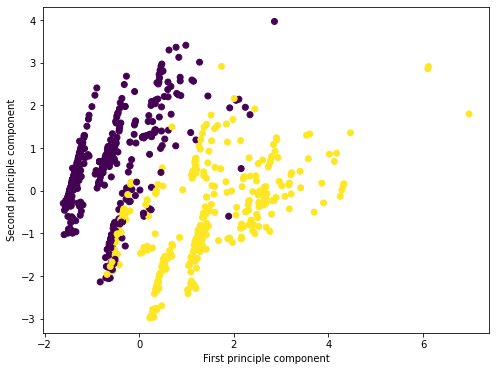

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Survived'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

Here I plot this figure basted on the target value.Here we can see that splitiong is almost perfet and it does not loss that much data 